# Chapter 2: Representing position & orientation


# Preliminary

### 1. Package Installation

If you have not already installed the required packages, run the following command **once** (then comment or delete it):
```python
!pip install ipympl spatialmath-python
```

### 2. Jupyter Notebook Configuration

These settings improve the display of outputs in the notebook.
-  Shows the result of the last expression or assignment in each cell.
-  Enables HTML display capabilities.

In [110]:
# Install before use (uncomment)
# !pip install ipympl spatialmath-python

# Jupyter Notebook Configuration
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML
from IPython.display import Image, display
# Display the result of the last expression or assignment in a cell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

### 3. Library Imports

This section imports all the necessary Python libraries for scientific computing, plotting, and spatial math.

-  **Standard libraries:** numpy, math, scipy, matplotlib
-  **Spatialmath libraries:** for robotics and 3D spatial operations
-  Enables interactive matplotlib widgets for 3D plot rotation in the notebook

In [111]:
# Standard imports
import numpy as np
import math
from math import pi
from scipy import linalg
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from sympy import Symbol, Matrix, simplify, pprint
# Enable interactive matplotlib widgets
%matplotlib widget

### 4. NumPy Print Options & Reproducibility

Configures NumPy to print arrays in a readable format, and sets a fixed random seed for reproducible results.

In [112]:
# Numpy print options and reproducibility
np.set_printoptions(
    linewidth=120,
    formatter={'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"}
)
np.random.seed(0)

# 2.2 Working in Two Dimensions(2D)

## 2.2.1 Orientation in Two Dimensions

A **2-dimensional world**, or *plane*, is familiar from high school geometry. We use a **right-handed Cartesian coordinate system** (or coordinate frame) with orthogonal axes, denoted $x$ and $y$. Typically, the $x$-axis points to the right and the $y$-axis points upwards. The point where the axes intersect is called the **origin**.

The **basis vectors** are unit vectors parallel to the axes, denoted by $\hat{\mathbf{x}}$ and $\hat{\mathbf{y}}$. Any point in this plane can be represented by its $x$- and $y$-coordinates $(x, y)$, or as a **coordinate vector** from the origin to the point:

$$
\mathbf{p} = x \hat{\mathbf{x}} + y \hat{\mathbf{y}} \tag{2.7}
$$

This is a linear combination of the basis vectors.

The figure below (Fig. 2.9) shows a **red coordinate frame** $\{B\}$, which we want to describe with respect to the **blue frame** $\{A\}$. The origin of frame $\{B\}$ has been displaced and the frame rotated counterclockwise.

We consider this in two parts:

1. **Pure rotation**
2. **Rotation plus translation**


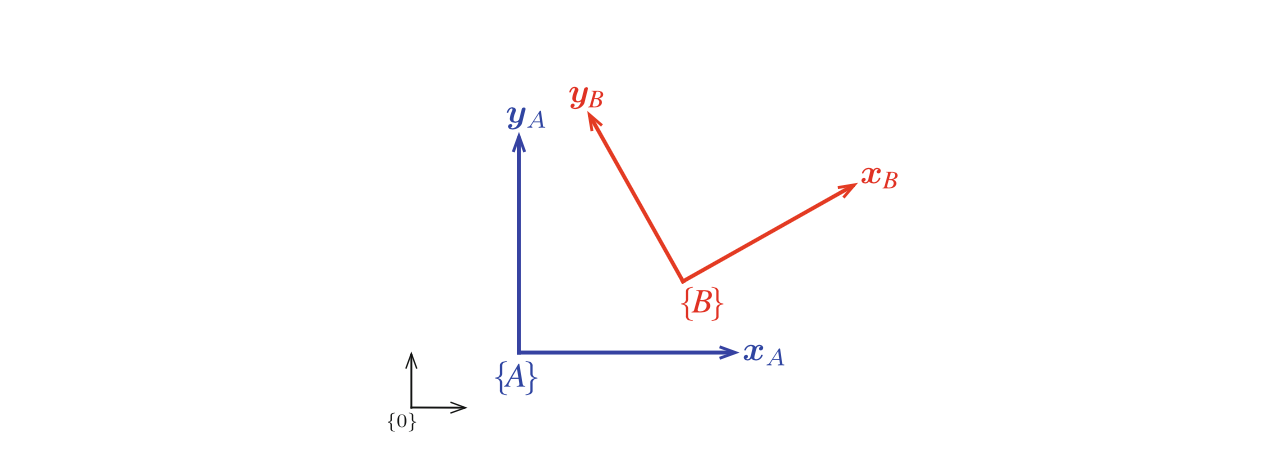
> **Fig. 2.9**: Two 2D coordinate frames $\{A\}$ and $\{B\}$, defined with respect to the reference frame $\{0\}$.  
> Frame $\{B\}$ is rotated and translated with respect to frame $\{A\}$.





Fig. 2.10 shows two coordinate frames $\{A\}$ and $\{B\}$ with a **common origin** but different **orientations**. Frame $\{B\}$ is obtained by rotating frame $\{A\}$ counterclockwise about the origin.
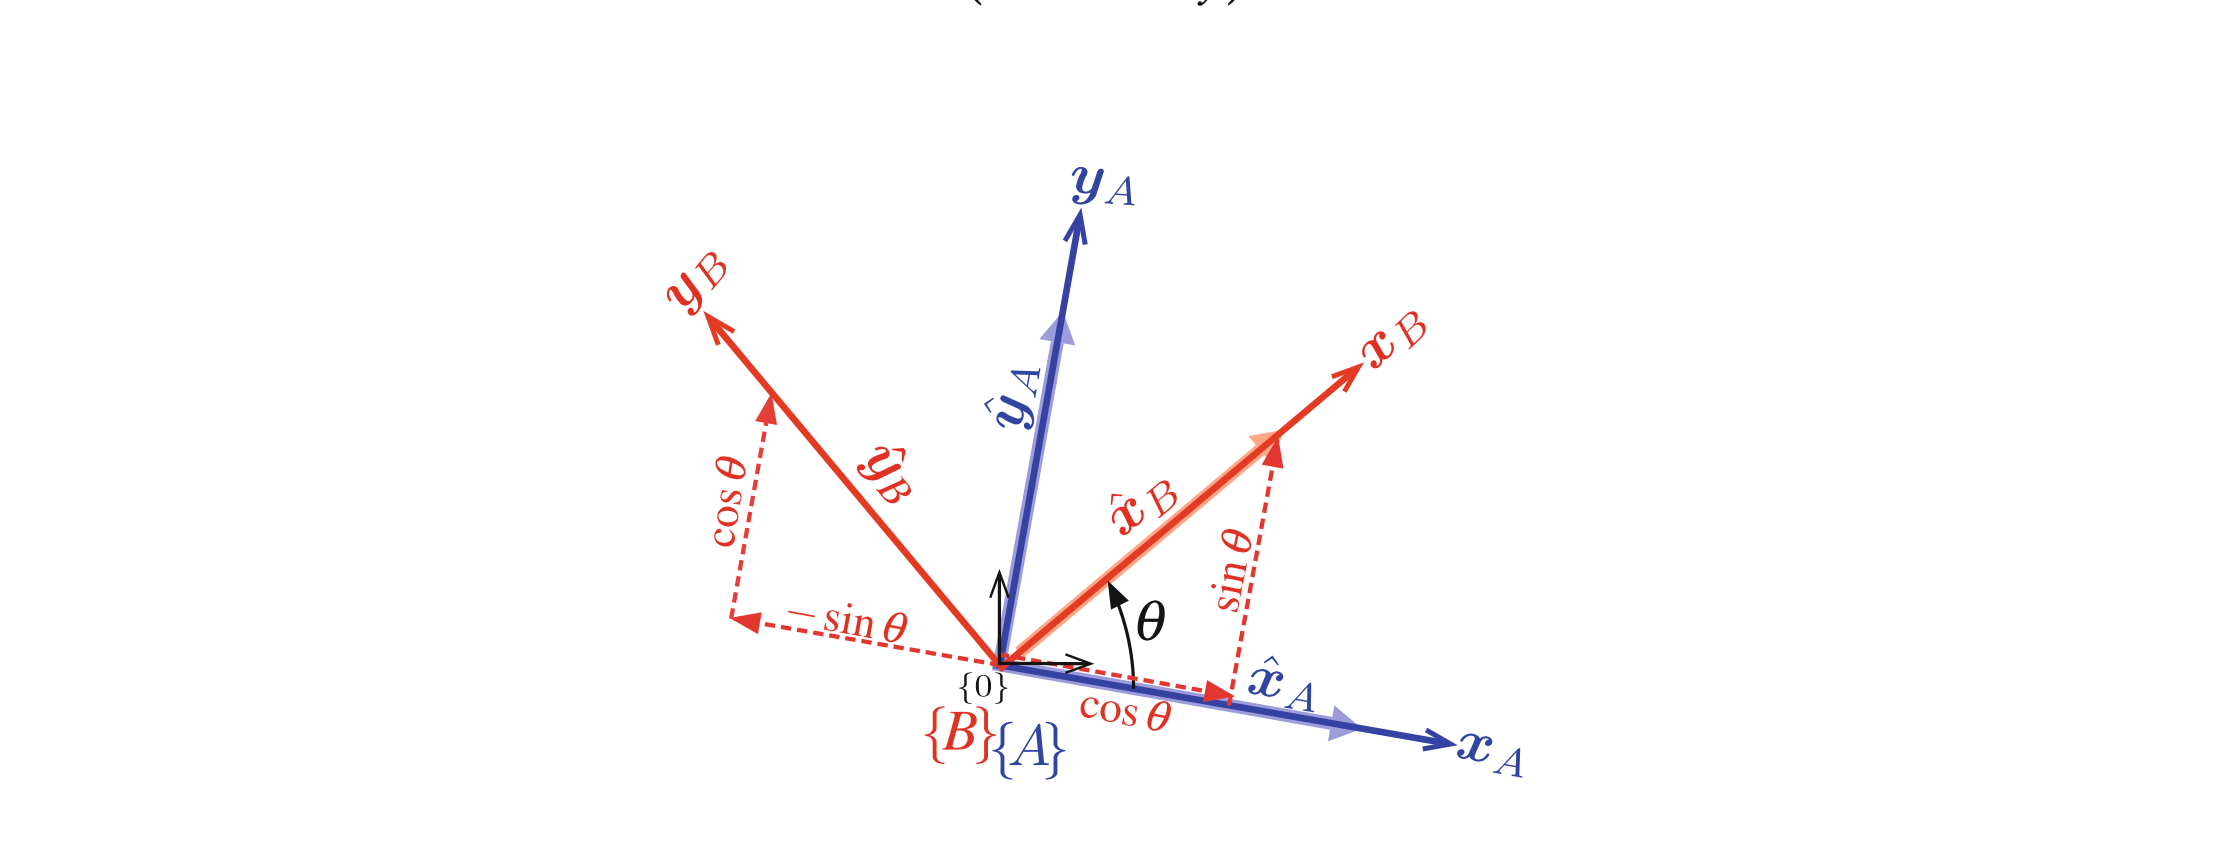

Frame $\{A\}$ is described by the directions of its axes, which are parallel to the basis vectors $\hat{\mathbf{x}}_A$ and $\hat{\mathbf{y}}_A$, defined with respect to a reference frame $\{0\}$. In 2D, these basis vectors are column vectors with two elements. We can stack them side-by-side to form a $2 \times 2$ matrix:



$$
\begin{bmatrix}
\hat{\mathbf{x}}_A & \hat{\mathbf{y}}_A
\end{bmatrix}
$$

This matrix completely describes frame $\{A\}$.
Similarly, frame $\{B\}$ is described by its basis vectors $\hat{\mathbf{x}}_B$ and $\hat{\mathbf{y}}_B$, which can be expressed in terms of frame $\{A\}$ as:



$$
\begin{aligned}
\hat{\mathbf{x}}_B &= \hat{\mathbf{x}}_A \cos\theta + \hat{\mathbf{y}}_A \sin\theta \\
\hat{\mathbf{y}}_B &= -\hat{\mathbf{x}}_A \sin\theta + \hat{\mathbf{y}}_A \cos\theta
\end{aligned}
$$


In matrix form, this becomes:
    $$
    \begin{bmatrix}
    \hat{\mathbf{x}}_B & \hat{\mathbf{y}}_B
    \end{bmatrix}
    =
    \begin{bmatrix}
    \hat{\mathbf{x}}_A & \hat{\mathbf{y}}_A
    \end{bmatrix}
    \underbrace{
    \begin{bmatrix}
    \cos\theta & \sin\theta \\
    -\sin\theta & \cos\theta
    \end{bmatrix}
    }_{\mathbf{R}_{B\leftarrow A}(\theta)} \tag{2.8}
    $$

Here, $\mathbf{R}_{B \leftarrow A}(\theta)$ is a **2D rotation matrix** that rotates frame $\{A\}$ into alignment with frame $\{B\}$. Rotation matrices have the following key properties:
- The **columns** are unit vectors and orthogonal.
- The matrix is **orthogonal**, so $\mathbf{R}^{-1} = \mathbf{R}^\top$.
- It **preserves vector lengths and angles**, so $\det(\mathbf{R}) = +1$.
- It belongs to the **Special Orthogonal group** $SO(2)$ — the set of all 2D rotation matrices under matrix multiplication.



[[       1        0]
 [       0        1]]


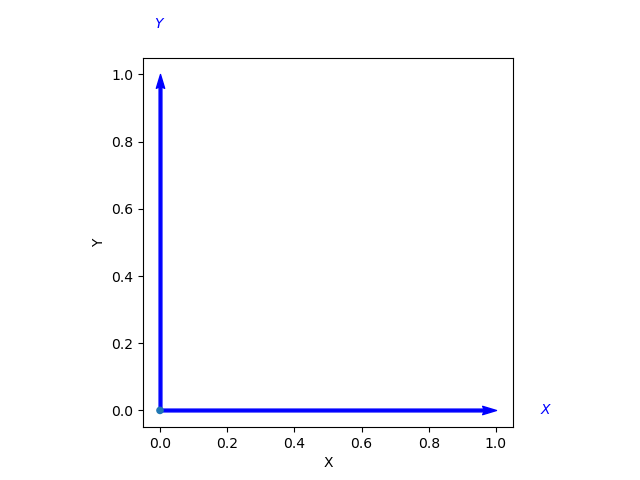

In [ ]:
R_zero = rot2(0)
print(R_zero)
plotvol2(new=True)
trplot2(R_zero);

[[  0.9553  -0.2955]
 [  0.2955   0.9553]]


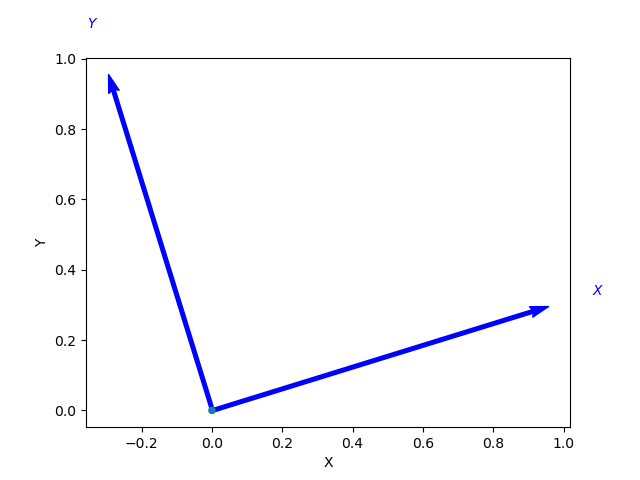

In [ ]:
R = rot2(0.3)
print(R)
plotvol2(new=True)
trplot2(R);

Given a matrix:

$$
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

The determinant of matrix $A$ is:

$$
\det(A) = ad - bc
$$


In [76]:
np.linalg.det(R)

0.9999999999999999

In [ ]:
theta = Symbol('theta')
R = Matrix(rot2(theta))  # convert to SymPy matrix

In [ ]:
simplify(R * R)

In [ ]:
R.det()

In [ ]:
R.det().simplify()

## 2.2.2 Pose in Two Dimensions


We want to express a point $\mathbf{p}_B = (B_x, B_y)$ (in frame $\{B\}$) with respect to frame $\{A\}$.


Step 1: Apply Rotation
    - We use the rotation matrix $\mathbf{R}_{AB}(\theta)$ to align frame $\{B\}$ with $\{A'\}$ (a rotated frame that shares $\{A\}$'s orientation):
    $$
    \begin{bmatrix}
    A'_x \\
    A'_y
    \end{bmatrix}
    =
    \begin{bmatrix}
    \cos\theta & -\sin\theta \\
    \sin\theta & \cos\theta
    \end{bmatrix}
    \begin{bmatrix}
    B_x \\
    B_y
    \end{bmatrix}
    $$

Step 2: Apply Translation
    - Since frame $\{A\}$ is offset from frame $\{A'\}$ by a translation $\mathbf{t} = (t_x, t_y)$:
    $$
    \begin{bmatrix}
    A_x \\
    A_y
    \end{bmatrix}
    =
    \begin{bmatrix}
    A'_x \\
    A'_y
    \end{bmatrix}
    +
    \begin{bmatrix}
    t_x \\
    t_y
    \end{bmatrix}
    $$

Combined Matrix Form
    - The transformation combining rotation and translation is:
    $$
    \begin{bmatrix}
    A_x \\
    A_y
    \end{bmatrix}
    =
    \mathbf{R}_{AB}(\theta)
    \begin{bmatrix}
    B_x \\
    B_y
    \end{bmatrix}
    +
    \mathbf{t}
    $$

Or in **homogeneous form**:
    $$
    \begin{bmatrix}
    A_x \\
    A_y \\
    1
    \end{bmatrix}
    =
    \underbrace{
    \begin{bmatrix}
    \cos\theta & -\sin\theta & t_x \\
    \sin\theta & \cos\theta & t_y \\
    0 & 0 & 1
    \end{bmatrix}
    }_{\mathbf{T}_{AB} \in SE(2)}
    \begin{bmatrix}
    B_x \\
    B_y \\
    1
    \end{bmatrix}
    $$


T_0 (Reference frame):
 [[       1        0        0]
 [       0        1        0]
 [       0        0        1]]


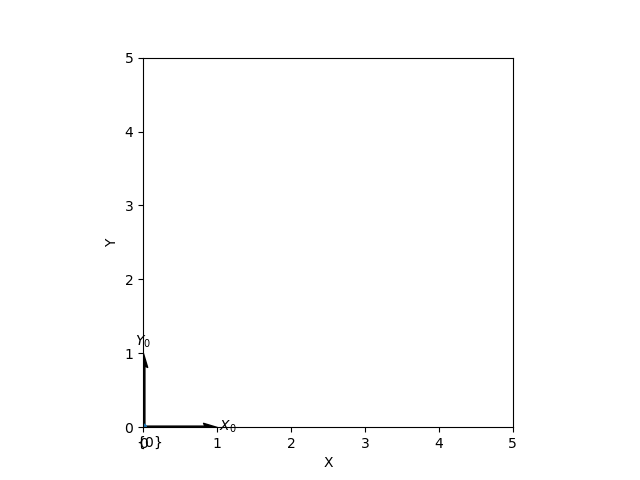

In [46]:
# Reference frame
T_0 = transl2(0, 0);
print("T_0 (Reference frame):\n", T_0);
plotvol2([0, 5], new=True);  # new plot with both axes from 0 to 5
trplot2(T_0, frame="0", color="k");


In [47]:
# Frame A: translate (1,2) and rotate 30 deg
T_A = transl2(1, 2) @ trot2(30, "deg");
print("T_A (Translate (1,2) then rotate 30°):\n", T_A);
trplot2(T_A, frame="A", color="b");

T_A (Translate (1,2) then rotate 30°):
 [[   0.866     -0.5        1]
 [     0.5    0.866        2]
 [       0        0        1]]


In [48]:
# Frame B: translate (2,1)
T_B = transl2(2, 1);
print("T_B (Translate (2,1)):\n", T_B);
trplot2(T_B, frame="B", color="r");

T_B (Translate (2,1)):
 [[       1        0        2]
 [       0        1        1]
 [       0        0        1]]


In [49]:
# A then B (A->B)
T_AB = T_A @ T_B;
print("T_AB (T_A @ T_B):\n", T_AB);
trplot2(T_AB, frame="AB", color="g");


T_AB (T_A @ T_B):
 [[   0.866     -0.5    2.232]
 [     0.5    0.866    3.866]
 [       0        0        1]]


In [50]:
# B then A (B->A)
T_BA = T_B @ T_A;
print("T_BA (T_B @ T_A):\n", T_BA);
trplot2(T_BA, frame="BA", color="c");

T_BA (T_B @ T_A):
 [[   0.866     -0.5        3]
 [     0.5    0.866        3]
 [       0        0        1]]


In [51]:
# Plot a point
P = np.array([3, 2]);
plot_point(P, "ko", label="P");

In [52]:
np.linalg.inv(T_A) @ np.hstack([P, 1])

array([   1.732,       -1,        1])

In [53]:
h2e(np.linalg.inv(T_A) @ e2h(P))

array([[   1.732],
       [      -1]])

In [54]:
homtrans(np.linalg.inv(T_A), P)

array([[   1.732],
       [      -1]])

### 2.2.2.2 Rotating a Coordinate Frame
The pose (position and orientation) of a 2D coordinate frame can be fully described using an SE(2) matrix. In this exercise, we'll explore how to represent and visualize translations and rotations of frames, including rotations about arbitrary points.


<AxesSubplot:xlabel='X', ylabel='Y'>

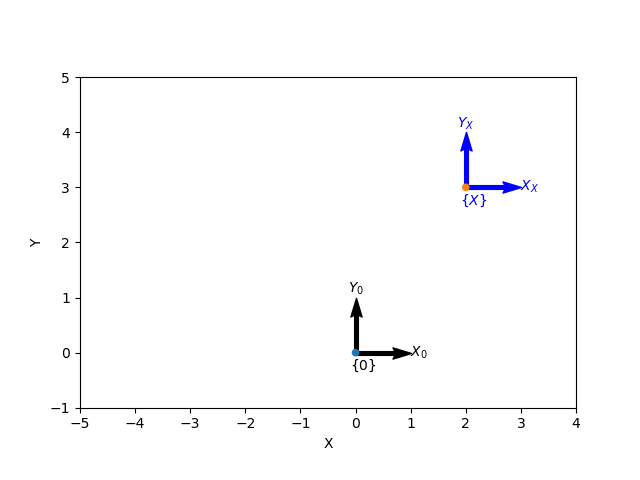

In [55]:
# Set plot volume for visualization (x: -5 to 4, y: -1 to 5)
plotvol2([-5, 4, -1, 5], new=True)

# Create and plot the reference frame at the origin (frame "0", black)
T_0 = transl2(0, 0)
trplot2(T_0, frame="0", color="k")

# Create and plot a target frame translated to (2, 3) (frame "X", blue)
T_X = transl2(2, 3)
trplot2(T_X, frame="X", color="b")

In [56]:
# Create a rotation matrix for 2 radians (~114.6°, green)
T_R = trot2(2);

# Apply the rotation before the translation (rotate then translate)
# This rotates the frame about the origin, then moves it to (2, 3)
trplot2(T_R @ T_X, frame="RX", color="g");

# Apply the translation before the rotation (translate then rotate)
# This moves the frame to (2, 3), then rotates about the origin of frame X
trplot2(T_X @ T_R, frame="XR", color="r");


In [57]:
# Define the arbitrary point C and plot it (black dot, labeled "C")
C = np.array([3, 2])
plot_point(C, "ko", text="C");

# Create a transform to rotate about point C:
# 1. Translate so point C moves to the origin
# 2. Rotate
# 3. Translate back to original location
T_C = transl2(C) @ T_R @ transl2(-C);

# Apply this transformation to frame X and plot (red)
trplot2(T_C @ T_X, frame="XC", color="y");

# 2.3 Working in Three Dimensions (3D)


## 2.3.1 Orientation in Three Dimensions

The 3-dimensional case is an extension of the 2-dimensional case. We add an extra coordinate axis, denoted by $z$, that is orthogonal to both the $x$- and $y$-axes. This creates a complete 3D coordinate system that allows us to represent positions and orientations in space.

The direction of the $z$-axis follows the **right-hand rule** and forms a **right-handed coordinate frame**. 

> **Note:** The right-hand rule states that if you point the fingers of your right hand in the direction of the x-axis and curl them toward the y-axis, your thumb will point in the direction of the z-axis.

The basis vectors are unit vectors parallel to the axes, denoted by $\hat{\mathbf{x}}$, $\hat{\mathbf{y}}$ and $\hat{\mathbf{z}}$

These basis vectors are related by the following cross-product identities:

$$
\hat{\mathbf{z}} = \hat{\mathbf{x}} \times \hat{\mathbf{y}}, \quad
\hat{\mathbf{x}} = \hat{\mathbf{y}} \times \hat{\mathbf{z}}, \quad
\hat{\mathbf{y}} = \hat{\mathbf{z}} \times \hat{\mathbf{x}}
$$


A point P in 3D space can be represented in two equivalent ways:

1. By its coordinates $(x, y, z)$
2. As a coordinate vector from the origin:
   $$
   \mathbf{p} = x\hat{\mathbf{x}} + y\hat{\mathbf{y}} + z\hat{\mathbf{z}}
   $$



### 2.3.1.1 3D Rotation Matrix


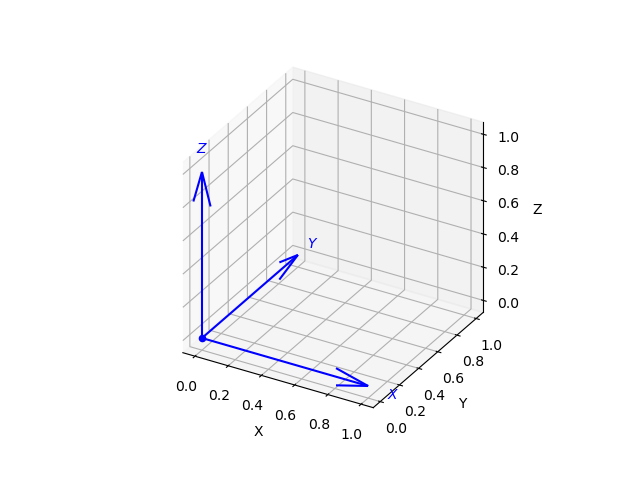

In [ ]:
R_zero = rotx(0)
plotvol3(new=True)
trplot(R_zero);

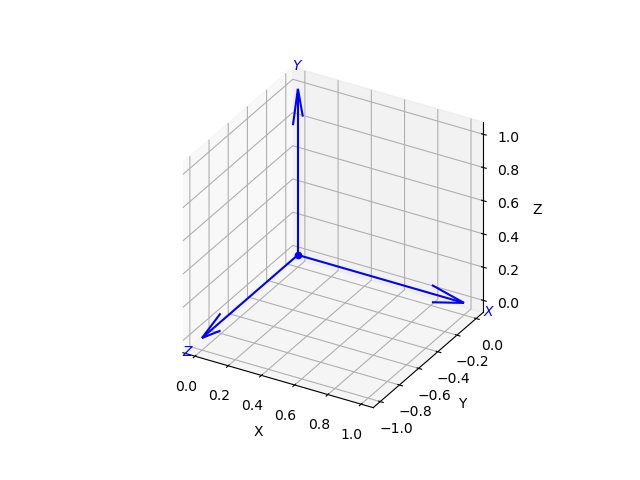

In [ ]:
R = rotx(pi / 2)
plotvol3(new=True)
trplot(R);

ValueError: dim must have 2 or 6 elements, got [1.5]. See docstring for details.

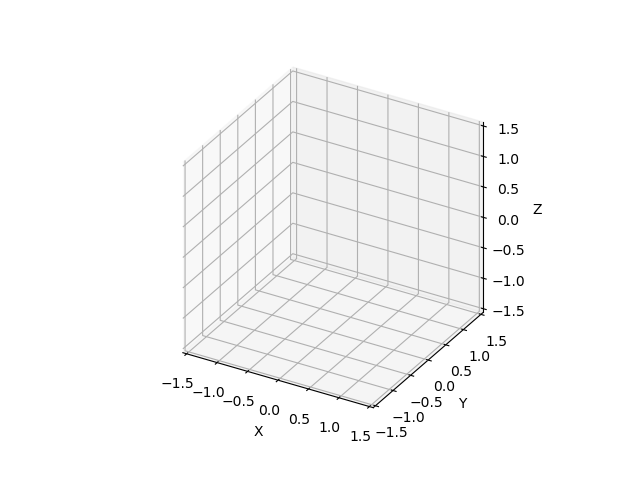

In [119]:
# tranimate(R)
plotvol3(new=True)  # for matplotlib/widget
HTML(tranimate(R, movie=True, dims=1.5))

<span style="background-color:red; font-size:20pt">NOTE</span>

Robust, portable animation in Jupyter notebooks is challenging.  Here we use an option to `tranimate` that causes it to return the animation as a snippet of HTML5 which is then displayed
```
HTML(tranimate(R, movie=True))
```
If you wish to animate a coordinate frame from a regular Python script use the simpler syntax
```
tranimate(R)
```


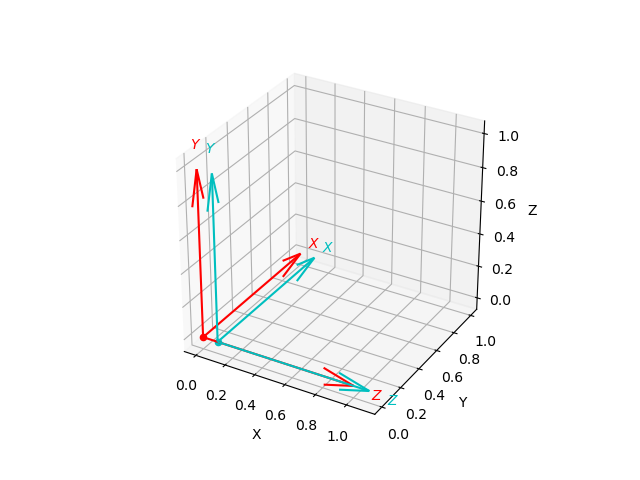

In [118]:
plotvol3(new=True)  # for matplotlib/widget
trplot(R, anaglyph=True)

TypeError: spatialmath.base.animate.Animate() got multiple values for keyword argument 'dim'

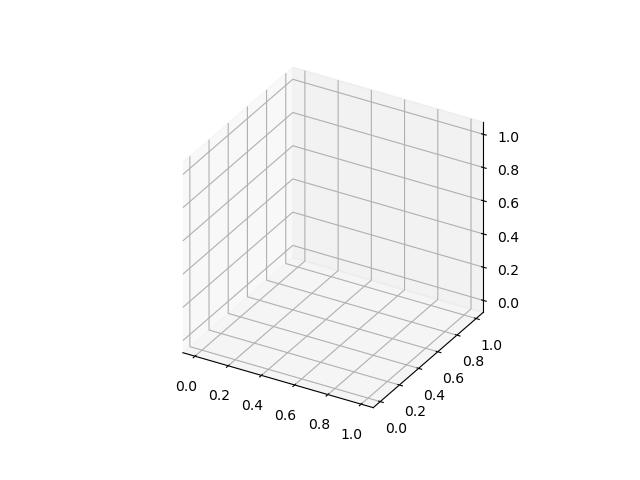

In [120]:
plotvol3(new=True)  # for matplotlib/widget
HTML(tranimate(R, anaglyph=True, movie=True, dim=1.5))

In [121]:
R = rotx(pi / 2) @ roty(pi / 2)
trplot(R);

In [122]:
Ryx = roty(pi / 2) @ rotx(pi / 2)

array([[       0,        1,        0],
       [       0,        0,       -1],
       [      -1,        0,        0]])

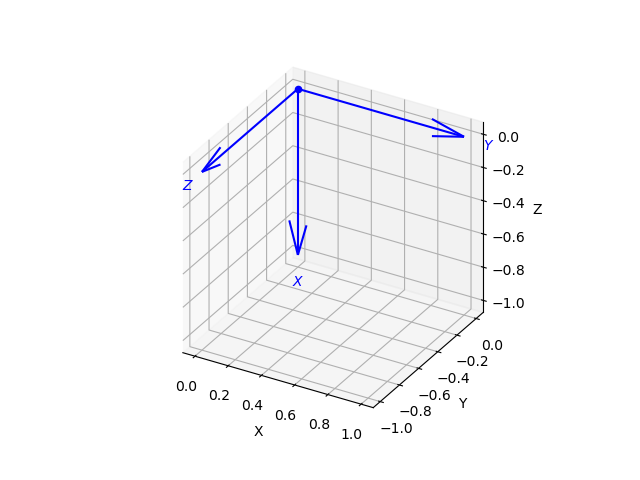

In [123]:
plotvol3(new=True)  # for matplotlib/widget
trplot(Ryx);

### 2.3.1.2 Three-Angle Representations


In [ ]:
R = rotz(0.1) @ roty(0.2) @ rotz(0.3);

In [ ]:
R = eul2r(0.1, 0.2, 0.3)

In [ ]:
gamma = tr2eul(R)

In [ ]:
R = eul2r(0.1, -0.2, 0.3)

In [ ]:
gamma = tr2eul(R)

In [ ]:
eul2r(gamma)

In [ ]:
R = eul2r(0.1, 0, 0.3)

In [ ]:
tr2eul(R)

In [ ]:
R = rpy2r(0.1, 0.2, 0.3, order="zyx")

In [ ]:
gamma = tr2rpy(R, order="zyx")

In [ ]:
R = rpy2r(0.1, 0.2, 0.3, order="xyz")

In [ ]:
gamma = tr2rpy(R, order="xyz")

<span style="background-color:red; font-size:20pt">NOTE</span>

The next cell will launch an interactive tool (using the Swift visualizer) in a new browser tab.  Close the browser tab when you are done with it. 

You might also have to stop the cell from executing, by pressing the stop button for the cell. It may terminate with lots of errors, don't panic.

In [ ]:
if COLAB or not SWIFT:
    print("we can't run this demo from the Colab environment (yet)")
else:
    %run -m tripleangledemo

### 2.3.1.3 Singularities and Gimbal Lock


### 2.3.1.4 Two-Vector Representation


In [ ]:
a = [0, 0, -1]

In [ ]:
o = [1, 1, 0]

In [ ]:
R = oa2r(o, a)

### 2.3.1.5 Rotation about an Arbitrary Vector


In [ ]:
R = rpy2r(0.1, 0.2, 0.3);

In [ ]:
theta, v = tr2angvec(R)

In [ ]:
theta

In [ ]:
v

In [ ]:
e, x = np.linalg.eig(R)

In [ ]:
e

In [ ]:
x

In [ ]:
theta = np.angle(e[0])

In [ ]:
R = angvec2r(0.3, [1, 0, 0])

### 2.3.1.6 Matrix Exponential for Rotation


In [ ]:
R = rotx(0.3)

In [ ]:
L = linalg.logm(R)

In [ ]:
S = vex(L)

In [ ]:
L = trlog(R);

In [ ]:
linalg.expm(L)

In [ ]:
trexp(L);

In [ ]:
linalg.expm(skew(S))

In [ ]:
R = rotx(0.3);

In [ ]:
R = linalg.expm(0.3 * skew([1, 0, 0]));

In [ ]:
X = skew([1, 2, 3])

In [ ]:
vex(X)

### 2.3.1.7 Unit Quaternions


In [ ]:
q = UnitQuaternion(rpy2r(0.1, 0.2, 0.3))

In [ ]:
q = q * q;

In [ ]:
q.inv()

In [ ]:
q * q.inv()

In [ ]:
q / q

In [ ]:
q.R

In [ ]:
q * [1, 0, 0]

In [ ]:
plotvol3(new=True)  # for matplotlib/widget
q.plot();

## 2.3.2 Pose in Three Dimensions


### 2.3.2.1 Homogeneous Transformation Matrix


In [ ]:
T = transl(2, 0, 0) @ trotx(pi / 2) @ transl(0, 1, 0)

In [ ]:
plotvol3(new=True)  # for matplotlib/widget
trplot(T);

In [ ]:
t2r(T)

In [ ]:
transl(T)

### 2.3.2.2 Matrix exponential for Pose


In [ ]:
T = transl(2, 3, 4) @ trotx(0.3)

In [ ]:
L = linalg.logm(T)

In [ ]:
S = vexa(L)

In [ ]:
linalg.expm(skewa(S))

In [ ]:
X = skewa([1, 2, 3, 4, 5, 6])

In [ ]:
vexa(X)

### 2.3.2.3 3D Twists


In [ ]:
S = Twist3.UnitRevolute([1, 0, 0], [0, 0, 0])

In [ ]:
linalg.expm(0.3 * skewa(S.S));  # different to book, see §2.2.1.2

In [ ]:
S.exp(0.3)

In [ ]:
S = Twist3.UnitRevolute([0, 0, 1], [2, 3, 2], 0.5)

In [ ]:
X = transl(3, 4, -4);

In [ ]:
for theta in np.arange(0, 15, 0.3):
  trplot(S.exp(theta).A @ X, style="rviz", width=2)

L = S.line()
L.plot('k:', linewidth=2);


In [ ]:
S = Twist3.UnitPrismatic([0, 1, 0])

In [ ]:
S.exp(2)

In [ ]:
T = transl(1, 2, 3) @ eul2tr(0.3, 0.4, 0.5);
S = Twist3(T)

In [ ]:
S.w

In [ ]:
S.pole

In [ ]:
S.pitch

In [ ]:
S.theta

# 2.4 Advanced Topics


## 2.4.5 Distance Between Orientations


In [ ]:
UnitQuaternion.Rx(pi / 2).angdist(UnitQuaternion.Rz(-pi / 2))

## 2.4.6 Normalization


In [ ]:
R = np.eye(3,3);
np.linalg.det(R) - 1

In [ ]:
for i in range(100):
  R = R @ rpy2r(0.2, 0.3, 0.4);
np.linalg.det(R) - 1

In [ ]:
R = trnorm(R);

In [ ]:
np.linalg.det(R) - 1

In [ ]:
q = q.unit();

In [ ]:
# T = T1 @ T2
# q = q1 @ q2

## 2.4.8 More About Twists


In [ ]:
S = Twist3.UnitRevolute([1, 0, 0], [0, 0, 0])

In [ ]:
S.S
S.v
S.w

In [ ]:
S.skewa()

In [ ]:
trexp(0.3 * S.skewa())

In [ ]:
S.exp(0.3)

In [ ]:
S2 = S * S
S2.printline(orient="angvec", unit="rad")

In [ ]:
line = S.line()

In [ ]:
plotvol3([-5, 5], new=True)  # setup volume in which to display the line
line.plot("k:", linewidth=2);

In [ ]:
T = transl(1, 2, 3) @ eul2tr(0.3, 0.4, 0.5);
S = Twist3(T)

In [ ]:
S / S.theta

In [ ]:
S.unit();

In [ ]:
S.exp(0)

In [ ]:
S.exp(1)

In [ ]:
S.exp(0.5)

<span style="background-color:red; font-size:20pt">NOTE</span>

The next cell will launch an interactive tool (using the Swift visualizer) in a new browser tab.  Close the browser tab when you are done with it. 

You might also have to stop the cell from executing, by pressing the stop button for the cell. It may terminate with lots of errors, don't panic.

In [ ]:
if COLAB or not SWIFT:
    print("we can't run this demo from the Colab environment (yet)")
else:
    %run -m twistdemo

# 2.5 Using the Toolbox


In [ ]:
from spatialmath.base import *

In [ ]:
from spatialmath import *

In [ ]:
R = rotx(0.3)  # create SO(3) matrix as NumPy array
type(R)
R = SO3.Rx(0.3)  # create SO3 object
type(R)

In [ ]:
R.A

In [ ]:
R = SO3(rotx(0.3));                   # convert an SO(3) matrix
R = SO3.Rz(0.3);                      # rotation about z-axis
R = SO3.RPY(10, 20, 30, unit="deg");  # from roll-pitch-yaw angles
R = SO3.AngleAxis(0.3, (1, 0, 0));    # from angle and rotation axis
R = SO3.EulerVec((0.3, 0, 0));        # from an Euler vector

In [ ]:
R.rpy();        # convert to roll-pitch-yaw angles
R.eul();        # convert to Euler angles
R.printline();  # compact single-line print

In [ ]:
R = SO3.RPY(10, 20, 30, unit="deg");             # create an SO(3) rotation
T = SE3.RPY(10, 20, 30, unit="deg");             # create a purely rotational SE(3)
S = Twist3.RPY(10, 20, 30, unit="deg");          # create a purely rotational twist
q = UnitQuaternion.RPY(10, 20, 30, unit="deg");  # create a unit quaternion

In [ ]:
TA = SE2(1, 2) * SE2(30, unit="deg");
type(TA)

In [ ]:
TA

In [ ]:
TA = SE2(1, 2, 30, unit="deg");

In [ ]:
TA.R
TA.t

In [ ]:
plotvol2(new=True)  # for matplotlib/widget
TA.plot(frame="A", color="b");

In [ ]:
TA.printline()

In [ ]:
P = [3, 2];
TA.inv() * P

In [ ]:
R = SO3.Rx(np.linspace(0, 1, 5));
len(R)
R[3]

In [ ]:
R * [1, 2, 3]